signal sample: [  0.          19.2410122   26.09541763  20.02926186  11.71410985
  10.83833585  15.69702939  15.79319547   4.4442548  -12.54949808]
signal shape: (1000,)


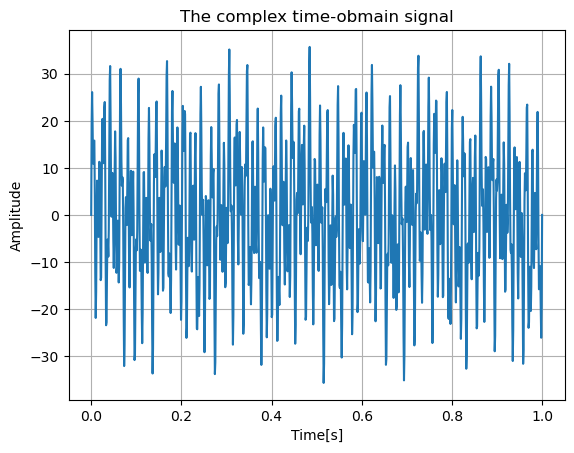

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

N = 1000
t = np.linspace(0,1,N)
frequency_1 = 50 
frequency_2 = 79
frequency_3 = 174
frequency_4 = 7
amplitude_1 = 10
amplitude_2 = 13
amplitude_3 = 11
amplitude_4 = 4 
signal = amplitude_1 * np.sin(2 * np.pi * frequency_1 * t) + amplitude_2 * np.sin(2 * np.pi * frequency_2 * t) + amplitude_3 * np.sin(2 * np.pi * frequency_3 * t) + amplitude_4 * np.sin(2 * np.pi * frequency_4 * t)
print('signal sample:',signal[:10]) 
print('signal shape:',signal.shape)
plt.figure(1)
plt.plot(t,signal)
plt.title('The complex time-obmain signal')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

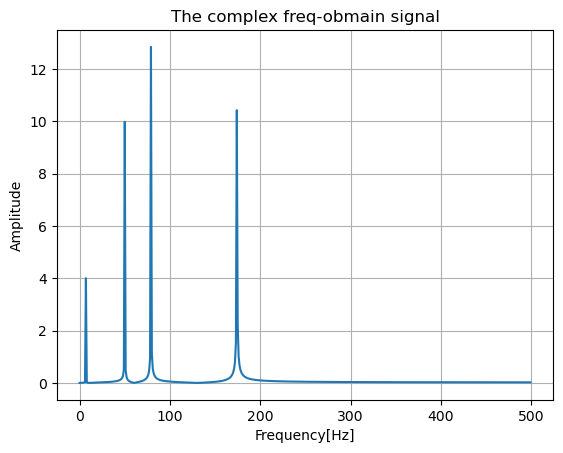

In [2]:
SIGNAL = np.fft.fft(signal)
freqs = np.fft.fftfreq(N,d=1/N)
SIGNAL_half = SIGNAL[:(N//2)]
freqs_half = freqs[:(N//2)]
magnitude_spectrum = np.abs(SIGNAL_half) * 2 / N
plt.figure(2)
plt.plot(freqs_half,magnitude_spectrum)
plt.title('The complex freq-obmain signal')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [3]:
from scipy.signal import find_peaks
peaks,_ = find_peaks(magnitude_spectrum)
peak_x = freqs_half[peaks]
peak_y = magnitude_spectrum[peaks]
print('peak_y:',peak_y)
print('peak_x',peak_x)

peak_y: [ 4.00357257  9.98577872 12.84945867 10.43055717]
peak_x [  7.  50.  79. 174.]


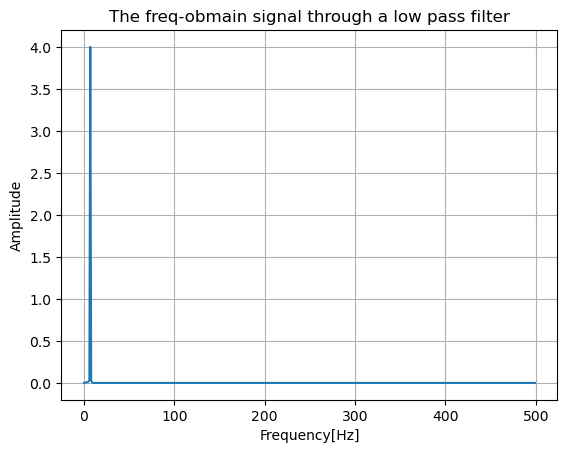

In [4]:
cutoff_freq = 10
filter_mask = np.abs(freqs) < cutoff_freq
SIGNAL_filter = SIGNAL * filter_mask
magnitude_spectrum_filter = np.abs(SIGNAL_filter)[:N//2] * 2 / N
plt.figure(3)
plt.plot(freqs_half,magnitude_spectrum_filter)
plt.title('The freq-obmain signal through a low pass filter')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

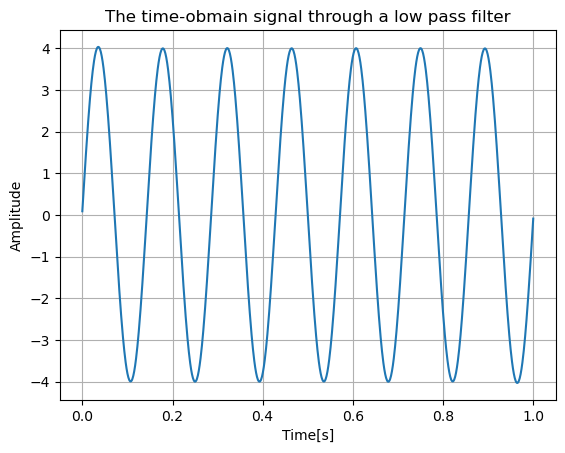

In [5]:
signal_filter_ifftresult = np.fft.ifft(SIGNAL_filter)
signal_filter = np.real(signal_filter_ifftresult)
plt.figure(4)
plt.plot(t,signal_filter)
plt.title('The time-obmain signal through a low pass filter')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()